# 期末测试  ---python数据分析实务

### 爬取小猪短租上海普陀区房源信息 

In [6]:
import requests
from lxml import etree

## 0 网页访问相关信息设置、网页访问及DOM构造

In [25]:
#设置抓取的网址信息
get_urlsss = 'https://sh.xiaozhu.com/putuo-duanzufang-8/'

#设置User-Agent信息
#最好设置自己的User-Agentpost_url
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
}

#使用requests访问网页，获取网页内容
ss = requests.Session()

#获取网页内容
content = ss.get(url=get_url,headers=headers).text

#使用lxml构造文档对象模型DOM
html = etree.HTML(content)

## 1 访问首页的一个页面的网页对象解析
### 问题1 ： 使用xpath进行网页解析，得到短租房源详细信息

In [9]:
#分析网页结构，发现标签 ul/li 下是一条条房源信息，解析获取房源列表
house_list = html.xpath('//div[@id="page_list"]//ul/li')
print(len(house_list))

house=[]  #存放抓取的房源信息
if len(house_list):
    for tr in house_list:
        item = {}   #临时存放当前的一条房源信息
        
        #房源标题与价格
        #Problem 1a  ： 获取房源标题、价格存放在字典item的键title与price中，价格只保留数字 
        #your code
        item['title'] = tr.xpath('./div[2]/div[2]/a/span/text()')[0]#换成您的code
        item['price'] = tr.xpath('./div[2]/div[1]/span/i/text()')[0]#换成您的code
        
        
        #房源基本信息：出租类型、房型、床位数、宜住人数
        #Problem 1b  ： 先获取房源基本信息存放在houseinfo中
        #your code
        houseinfo= tr.xpath('./div[2]/div[2]/em/text()')[0]#换成您的code
        
        
        #再拆分成：出租类型、房型、床位数houseinfo、宜住人数 ,注意并不是每个房源都有这4个信息
        #your code
        
        list1=[]
        list1=houseinfo.split('/')
        if len(list1)==4:
            renttype=list1[0] 
            housetype=list1[1] 
            beds=list1[2] 
            person=list1[3]
        else:
            renttype='' 
            housetype=list1[0] 
            beds=list1[1] 
            person=list1[2]
        
        
        #上面代码处理好后再存入字典item
        item['renttype'] =str(renttype).strip()
        item['housetype'] =str(housetype).strip()
        item['beds'] =str(beds).strip()
        item['person'] =str(person).strip()
        
        #房源评分、评论数
        #先获取房源评论信息reviews，
        reviews="".join(tr.xpath('.//em[@class="hiddenTxt"]/span/text()'))
        #再拆分成：房源评分、评论数
        reviews=reviews.split('/')
        if len(reviews)==2:
            score,reviewnum=reviews
        else:
            score=0
            reviewnum=reviews[0]
        item['score'] =str(score).strip()
        item['reviewnum'] =str(reviewnum).strip()        
        
        house.append([item['title'],item['price'],item['renttype'],item['housetype'],item['beds'],item['person'],item['score'],item['reviewnum']])

print(house[:2])


24
[['金沙江路地铁站3号、4号、13号线附近房屋', '300', '整套出租', '2室1厅', '2张床', '宜住3人', '0', '- 0条点评'], ['长寿路地铁站/7号13号线 /现代简约主题房', '328', '整套出租', '1室0厅', '1张床', '宜住2人', '0', '- 3条点评']]


## 2 抓取小猪网上的所有普陀区的房源信息

### 问题2 ： 抓取普陀区的所有的短租房源信息
#### 上面1中只抓取了普陀区首页的房源信息

### 先把1中的代码，整理成两个函数get_url与parse_html。

In [32]:
#获取网页内容
def get_url(url,headers):
    ss = requests.Session()
    resp = ss.get(url, headers=headers)
    html = resp.text
  
    return html

#解析网页内容，利用1完成的内容，把里面缺失的代码补齐。
house=[]  #存放抓取的房源信息
def parse_html(content):
    html = etree.HTML(content)
    house_list = html.xpath('//div[@id="page_list"]//ul/li')

    house=[]  #存放抓取的房源信息
    if len(house_list):
        for tr in house_list:
            item = {}   #临时存放当前的一条房源信息

            #房源标题与价格
            #Problem 1a  ： 获取房源标题、价格存放在字典item的键title与price中，价格只保留数字 
            #your code
            item['title'] = tr.xpath('./div[2]/div[2]/a/span/text()')[0]#换成您的code
            item['price'] = tr.xpath('./div[2]/div[1]/span/i/text()')[0]#换成您的code


            #房源基本信息：出租类型、房型、床位数、宜住人数
            #Problem 1b  ： 先获取房源基本信息存放在houseinfo中
            #your code
            houseinfo= tr.xpath('./div[2]/div[2]/em/text()')[0]#换成您的code


            #再拆分成：出租类型、房型、床位数houseinfo、宜住人数 ,注意并不是每个房源都有这4个信息
            #your code

            list1=[]
            list1=houseinfo.split('/')
            if len(list1)==4:
                renttype=list1[0] 
                housetype=list1[1] 
                beds=list1[2] 
                person=list1[3]
            else:
                renttype=list1[0]  
                housetype=''
                beds=list1[1] 
                person=list1[2]


            #上面代码处理好后再存入字典item
            item['renttype'] =str(renttype).strip()
            item['housetype'] =str(housetype).strip()
            item['beds'] =str(beds).strip()
            item['person'] =str(person).strip()

            #房源评分、评论数
            #先获取房源评论信息reviews，
            reviews="".join(tr.xpath('.//em[@class="hiddenTxt"]/span/text()'))
            #再拆分成：房源评分、评论数
            reviews=reviews.split('/')
            if len(reviews)==2:
                score,reviewnum=reviews
            else:
                score=0
                reviewnum=reviews[0]
            item['score'] =str(score).strip()
            item['reviewnum'] =str(reviewnum).strip()        

            house.append([item['title'],item['price'],item['renttype'],item['housetype'],item['beds'],item['person'],item['score'],item['reviewnum']])
    return house

In [33]:
# Problem 2 ：使用上面函数，参考1中的方法，抓取普陀区所有的房源详细信息，并保存在嵌套列表house中。
#提示研究翻页的网页地址结构特征，构造翻页url，循环访问，获取房源信息

house=[]   #存放所有普陀区短租房源信息
for pageNo in range(1,14):  #将14换成实际的网页数
    
    if pageNo == 1:
        url = "https://sh.xiaozhu.com/putuo-duanzufang-8/"
    else:
        pagenum_str = str(pageNo)
        url = "https://sh.xiaozhu.com/putuo-duanzufang-p" + pagenum_str + "-8/"

    html=get_url(url, headers)
    house_info_list = parse_html(html)
    house += house_info_list

print(len(house))

300


In [34]:
print(house)

[['金沙江路地铁站3号、4号、13号线附近房屋', '300', '整套出租', '2室1厅', '2张床', '宜住3人', '0', '- 0条点评'], ['长寿路地铁站/7号13号线 /现代简约主题房', '328', '整套出租', '1室0厅', '1张床', '宜住2人', '0', '- 3条点评'], ['【海天之梦】静安寺中山公园大户型双卧室有电梯', '450', '整套出租', '2室0厅', '2张床', '宜住4人', '0', '- 1条点评'], ['甘泉路步行街      地铁7号线', '280', '整套出租', '1室1厅', '1张床', '宜住2人', '0', '- 0条点评'], ['近地铁3.4号线南京西路苏州河高层景观房', '468', '整套出租', '2室1厅', '2张床', '宜住4人', '- 4.9分', '14条点评'], ['长寿路武宁路路投影(欧啦小姐的的花房)', '420', '整套出租', '1室0厅', '1张床', '宜住2人', '0', '- 0条点评'], ['地铁口华师大 儿童医院 会展中心 静安寺外滩', '438', '整套出租', '2室1厅', '2张床铺', '宜住3人', '0', '- 0条点评'], ['长寿路南梦宫live，中心城区，四通八达', '350', '整套出租', '1室0厅', '1张床', '宜住2人', '0', '- 2条点评'], ['北欧风情民宿/投影仪/温馨小屋/13号线地铁', '158', '整套出租', '1室0厅', '1张床', '宜住2人', '0', '- 1条点评'], ['淮海中路/思南路，宽敞两层带露台特色老洋房', '358', '整套出租', '1室1厅', '1张床', '宜住2人', '0', '- 2条点评'], ['中环地带高档舒适床位！', '60', '合住房间', '', '1张床', '宜住1人', '0', '- 0条点评'], ['上海火车站，外滩，人民广场，清爽男生6人间', '48', '合住房间', '', '1张床', '宜住1人', '0', '- 1条点评'], ['江宁路地铁站、近静安、火车站的日式榻榻米小屋', '358', '整套出租', '1室0厅', '1张床', '

## 3 构造pandas数据框，进行数据预处理

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 问题3   构造pandas数据框，进行基本的数据分析 

In [144]:
colname=['title','price','renttype','housetype','beds','person','score','reviewnum']
df=pd.DataFrame(house,columns=colname)

df.head(300)

,title,price,renttype,housetype,beds,person,score,reviewnum
0,金沙江路地铁站3号、4号、13号线附近房屋,300,整套出租,2室1厅,2张床,宜住3人,0,- 0条点评
1,长寿路地铁站/7号13号线 /现代简约主题房,328,整套出租,1室0厅,1张床,宜住2人,0,- 3条点评
2,【海天之梦】静安寺中山公园大户型双卧室有电梯,450,整套出租,2室0厅,2张床,宜住4人,0,- 1条点评
3,甘泉路步行街 地铁7号线,280,整套出租,1室1厅,1张床,宜住2人,0,- 0条点评
4,近地铁3.4号线南京西路苏州河高层景观房,468,整套出租,2室1厅,2张床,宜住4人,- 4.9分,14条点评
5,长寿路武宁路路投影(欧啦小姐的的花房),420,整套出租,1室0厅,1张床,宜住2人,0,- 0条点评
6,地铁口华师大 儿童医院 会展中心 静安寺外滩,438,整套出租,2室1厅,2张床铺,宜住3人,0,- 0条点评
7,长寿路南梦宫live，中心城区，四通八达,350,整套出租,1室0厅,1张床,宜住2人,0,- 2条点评
8,北欧风情民宿/投影仪/温馨小屋/13号线地铁,158,整套出租,1室0厅,1张床,宜住2人,0,- 1条点评
9,淮海中路/思南路，宽敞两层带露台特色老洋房,358,整套出租,1室1厅,1张床,宜住2人,0,- 2条点评


In [145]:
# Problem 3a ：
#统计挂牌的总房源量，其中整租与合租房源各多少？

print("总共有：", df.shape[0])
df_zheng=df[df['renttype']=='整套出租']
df_he=df[df['renttype']=='合住房间']

print("合租：", df_zheng.shape[0])

print("整租：", df_he.shape[0])


总共有： 300
合租： 191
整租： 11


In [146]:
#Problem 3b : 处理housetype字段，生成一个只保留室数的新字段：shishu
#提示（从housetype中抽取室数可用pandas的str函数中的功能来处理）
#your code
#df = df.drop(['shishu'], axis=1)
df['shishu']= df['housetype'].str.split('室',expand=True)[0]


#处理beds字段，只保留床位数

df['beds']= df['beds'].str.split('张',expand=True)
df

,title,price,renttype,housetype,beds,person,score,reviewnum,shishu
0,金沙江路地铁站3号、4号、13号线附近房屋,300,整套出租,2室1厅,2,宜住3人,0,- 0条点评,2
1,长寿路地铁站/7号13号线 /现代简约主题房,328,整套出租,1室0厅,1,宜住2人,0,- 3条点评,1
2,【海天之梦】静安寺中山公园大户型双卧室有电梯,450,整套出租,2室0厅,2,宜住4人,0,- 1条点评,2
3,甘泉路步行街 地铁7号线,280,整套出租,1室1厅,1,宜住2人,0,- 0条点评,1
4,近地铁3.4号线南京西路苏州河高层景观房,468,整套出租,2室1厅,2,宜住4人,- 4.9分,14条点评,2
5,长寿路武宁路路投影(欧啦小姐的的花房),420,整套出租,1室0厅,1,宜住2人,0,- 0条点评,1
6,地铁口华师大 儿童医院 会展中心 静安寺外滩,438,整套出租,2室1厅,2,宜住3人,0,- 0条点评,2
7,长寿路南梦宫live，中心城区，四通八达,350,整套出租,1室0厅,1,宜住2人,0,- 2条点评,1
8,北欧风情民宿/投影仪/温馨小屋/13号线地铁,158,整套出租,1室0厅,1,宜住2人,0,- 1条点评,1
9,淮海中路/思南路，宽敞两层带露台特色老洋房,358,整套出租,1室1厅,1,宜住2人,0,- 2条点评,1


In [147]:
#Problem 3c : 处理score字段，只保留数字（注意原有数字前不是减号）
#your code
df['score']= df['score'].str.replace('-','')
df['score']= df['score'].str.replace('分','')




In [148]:
#Problem 3d : 处理person字段，只保留数字（使用pandas的字符串函数功能，另‘\d’代表数字，类似正则表达式）
#your code

df


,title,price,renttype,housetype,beds,person,score,reviewnum,shishu
0,金沙江路地铁站3号、4号、13号线附近房屋,300,整套出租,2室1厅,2,[3],0,- 0条点评,2
1,长寿路地铁站/7号13号线 /现代简约主题房,328,整套出租,1室0厅,1,[2],0,- 3条点评,1
2,【海天之梦】静安寺中山公园大户型双卧室有电梯,450,整套出租,2室0厅,2,[4],0,- 1条点评,2
3,甘泉路步行街 地铁7号线,280,整套出租,1室1厅,1,[2],0,- 0条点评,1
4,近地铁3.4号线南京西路苏州河高层景观房,468,整套出租,2室1厅,2,[4],4.9,14条点评,2
5,长寿路武宁路路投影(欧啦小姐的的花房),420,整套出租,1室0厅,1,[2],0,- 0条点评,1
6,地铁口华师大 儿童医院 会展中心 静安寺外滩,438,整套出租,2室1厅,2,[3],0,- 0条点评,2
7,长寿路南梦宫live，中心城区，四通八达,350,整套出租,1室0厅,1,[2],0,- 2条点评,1
8,北欧风情民宿/投影仪/温馨小屋/13号线地铁,158,整套出租,1室0厅,1,[2],0,- 1条点评,1
9,淮海中路/思南路，宽敞两层带露台特色老洋房,358,整套出租,1室1厅,1,[2],0,- 2条点评,1


In [152]:
#显示处理好的部分数据
df.head(10)

,title,price,renttype,housetype,beds,person,score,reviewnum,shishu
0,金沙江路地铁站3号、4号、13号线附近房屋,300,整套出租,2室1厅,2,[3],0,0条点评,2
1,长寿路地铁站/7号13号线 /现代简约主题房,328,整套出租,1室0厅,1,[2],0,3条点评,1
2,【海天之梦】静安寺中山公园大户型双卧室有电梯,450,整套出租,2室0厅,2,[4],0,1条点评,2
3,甘泉路步行街 地铁7号线,280,整套出租,1室1厅,1,[2],0,0条点评,1
4,近地铁3.4号线南京西路苏州河高层景观房,468,整套出租,2室1厅,2,[4],4.9,14条点评,2
5,长寿路武宁路路投影(欧啦小姐的的花房),420,整套出租,1室0厅,1,[2],0,0条点评,1
6,地铁口华师大 儿童医院 会展中心 静安寺外滩,438,整套出租,2室1厅,2,[3],0,0条点评,2
7,长寿路南梦宫live，中心城区，四通八达,350,整套出租,1室0厅,1,[2],0,2条点评,1
8,北欧风情民宿/投影仪/温馨小屋/13号线地铁,158,整套出租,1室0厅,1,[2],0,1条点评,1
9,淮海中路/思南路，宽敞两层带露台特色老洋房,358,整套出租,1室1厅,1,[2],0,2条点评,1


#### 如果score、reviewnum字段值数字前还有减号，可用下面方法去除

In [150]:
dd=df['score'].str.split('-')  #使用字符串的拆分方法，得到拆分后的几个部分的列表
df['score']=dd.str[-1]         #数字在拆分后列表的末尾

dd=df['reviewnum'].str.split('-')  #使用字符串的拆分方法，得到拆分后的几个部分的列表
df['reviewnum']=dd.str[-1]         #数字在拆分后列表的末尾

In [151]:
#显示处理好的部分数据
df.head(10)

,title,price,renttype,housetype,beds,person,score,reviewnum,shishu
0,金沙江路地铁站3号、4号、13号线附近房屋,300,整套出租,2室1厅,2,[3],0,0条点评,2
1,长寿路地铁站/7号13号线 /现代简约主题房,328,整套出租,1室0厅,1,[2],0,3条点评,1
2,【海天之梦】静安寺中山公园大户型双卧室有电梯,450,整套出租,2室0厅,2,[4],0,1条点评,2
3,甘泉路步行街 地铁7号线,280,整套出租,1室1厅,1,[2],0,0条点评,1
4,近地铁3.4号线南京西路苏州河高层景观房,468,整套出租,2室1厅,2,[4],4.9,14条点评,2
5,长寿路武宁路路投影(欧啦小姐的的花房),420,整套出租,1室0厅,1,[2],0,0条点评,1
6,地铁口华师大 儿童医院 会展中心 静安寺外滩,438,整套出租,2室1厅,2,[3],0,0条点评,2
7,长寿路南梦宫live，中心城区，四通八达,350,整套出租,1室0厅,1,[2],0,2条点评,1
8,北欧风情民宿/投影仪/温馨小屋/13号线地铁,158,整套出租,1室0厅,1,[2],0,1条点评,1
9,淮海中路/思南路，宽敞两层带露台特色老洋房,358,整套出租,1室1厅,1,[2],0,2条点评,1


## 4 利用pandas进行基本的数据分析

In [85]:
#Problem 4a : 统计1室、2室、3室等各类房型的房源数量
#your code



1    155
2     33
3      4
4      2
Name: shishu, dtype: int64

In [88]:
#your code  统计租金的最高、最低、平均价等
df['price']=df['price'].astype("float")
df['price'].describe()

count      300.000000
mean       659.283333
std       5761.749779
min         48.000000
25%        150.000000
50%        308.000000
75%        398.000000
max      99999.000000
Name: price, dtype: float64

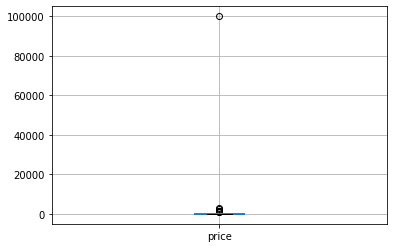

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

#制作租金的箱线图boxplot()
df.boxplot(column=['price'])


#### price的箱线图看不清，原因是有少数价格太高造成的不均衡，例如price大于1000的房源只有几条：

In [95]:
df[df['price']>1000].shape

(8, 9)

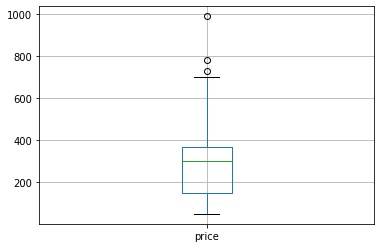

In [116]:
#Problem 4b: 请去除租金大于1000的房源再制作租金的箱线图
#your code  



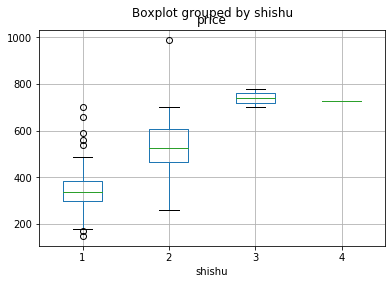

In [117]:
#Problem 4d : 请一张图上制作1室、2室、3室等的租金的箱线图（只计算租金不超过1000的房源）
#your code  boxplot




In [118]:
#Problem 4e : 统计价格分别0~200、200~400，400~600，600~800,800以上的房源数量
#提示（使用pandas的分箱功能，生成含有面积区间的面积字段,另要注意抓取的面积字段类型）
bins = [0,200, 400, 600, 800,10000]

#your code，设分箱后的数据存放在pricebins中
pricebins = #您的代码


#在统计分箱后的每个区间的数量pd.value_counts
pd.value_counts(pricebins)

(200, 400]      137
(0, 200]         97
(400, 600]       45
(600, 800]       12
(800, 10000]      8
Name: price, dtype: int64

## 5 对房源信息中的title进行分词，统计词频，并制作词云

### 问题5 中文分词、词频统计与词云制作，使用标题title字段

In [119]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Problem 5a ： 使用title字段中的内容进行中文分词，先将title转成一个长字符串conten
content=' '.join(df['title'].values.tolist())

# 对content分词，并统计词频，以字典存储，key是word，value是词频
word_dict = {}

#your codes    注意统计词频的方法




In [125]:
print(word_dict)

{'地铁': 90, '3.4': 1, '号线': 80, '南京': 11, '西路': 11, '苏州河': 6, '高层': 13, '景观': 10, '长寿路': 23, '南梦宫': 2, 'live': 1, '中心': 4, '城区': 1, '四通八达': 1, '地铁口': 14, '华师大': 21, '儿童医院': 4, '会展中心': 2, '静安寺': 27, '外滩': 14, '甘泉': 1, '步行街': 4, '13': 67, '长风': 7, '公园': 6, '跨国': 2, '采购': 2, '环球': 42, '三四十': 1, '三号': 1, '清新': 9, '房整': 2, '大悦': 3, '南京路': 4, '自然': 1, '博物馆': 1, '直达': 20, '电梯': 16, '上海': 50, '网红': 5, '民宿': 38, '北欧': 16, '风近': 1, '江宁路': 18, '地铁站': 28, '武宁路': 6, '投影': 3, '欧啦': 1, '小姐': 1, '花房': 1, '毕加索': 1, '西班牙': 1, '迪士尼': 11, '繁华': 2, '购物中心': 2, '海天': 1, '之梦': 1, '中山公园': 18, '大户型': 1, '卧室': 3, '风情': 5, '投影仪': 3, '温馨': 29, '小屋': 12, '仁涵': 2, '恋夏': 1, 'INS': 2, '粉色': 1, '简约': 17, '主题': 9, '火车站': 28, '附近': 45, '男生': 6, '高品质': 3, '青年': 3, '沿线': 2, '紧邻': 4, '步行': 5, '分长': 1, '短租': 4, '河畔': 1, '270': 1, '全景': 3, '三房': 1, '三轨': 1, '轨道': 2, '人广': 4, '人民广场': 5, '清爽': 6, '人间': 7, '中环': 10, '地带': 2, '高档': 5, '舒适': 20, '床位': 2, '小涵': 1, '魅影': 1, '亮色': 1, '独户': 1, '仪宿': 10, '一线': 2, '夜景': 1, '网红约': 1, '圣地'

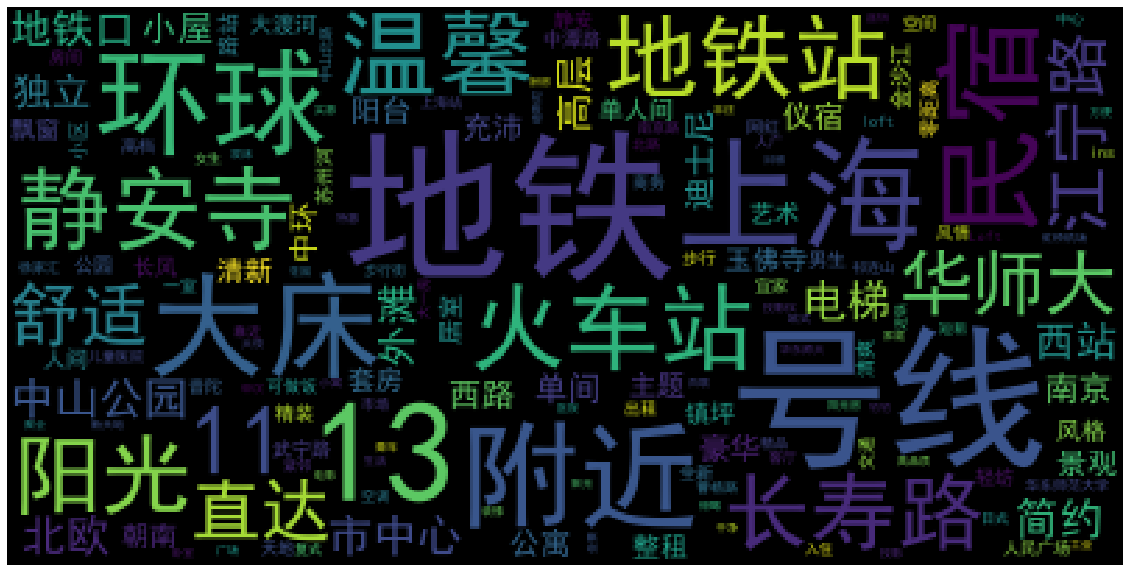

In [122]:
# Problem 5b ： 使用词频字典word_dict，制作词云

word = list(word_dict.keys())
word = sorted(word_dict.items(), key=lambda item: item[1], reverse=True)

#your code


#完成上面代码后绘图
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.close()

## 6 附加题（20分）

使用 selenium爬虫技术抓取上述房源中含有的评论数据，并利用词频统计，分析评论关注较多的内容是什么？

In [ ]:
# your code



请将ipynb文件邮件提交到rwwang@infor.ecnu.edu.cn, 该行勿删！<font color='white'>51194407379-蔡蓁.ipynb85</font>